In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords
import gapipes as gp

import kinesis as kn

In [2]:
d0 = Table.read(
    "/home/soh/data/gaia_dr2_clusters/tablea1a.dat",
    readme="/home/soh/data/gaia_dr2_clusters/ReadMe",
    format='ascii.cds').to_pandas()

In [3]:
d = pd.read_csv("/home/soh/data/gaia_dr2_clusters/table1a_gaiadr2_full.csv")

In [4]:
dd = d.merge(d0[['Source', 'Cluster']], left_on='source_id', right_on='Source')

In [5]:
g = dd.groupby('Cluster').get_group('Hyades')

In [6]:
len(g)

515

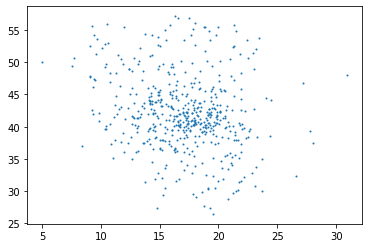

In [7]:
plt.scatter(g.g.icrs.cartesian.x, g.g.icrs.cartesian.y, s=1)

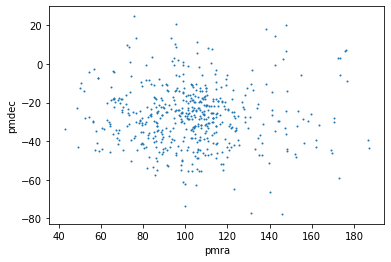

In [8]:
g.plot.scatter('pmra', 'pmdec', s=1)

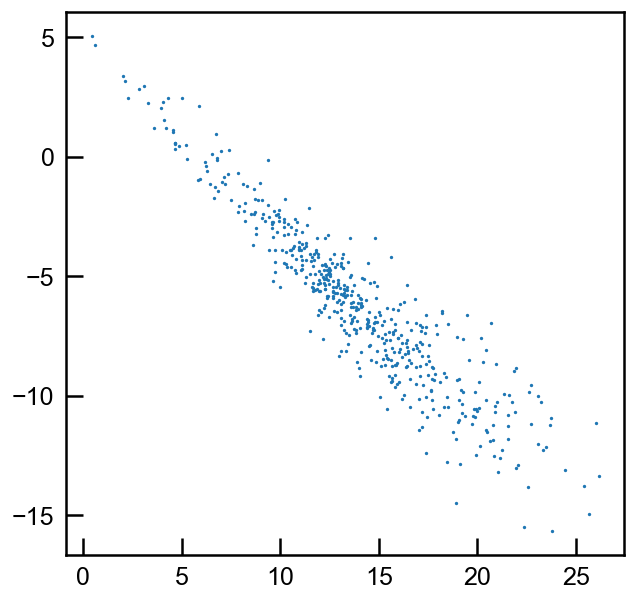

In [41]:
plt.scatter(g.g.icrs.cartesian.z, g.g.vdec, s=1)

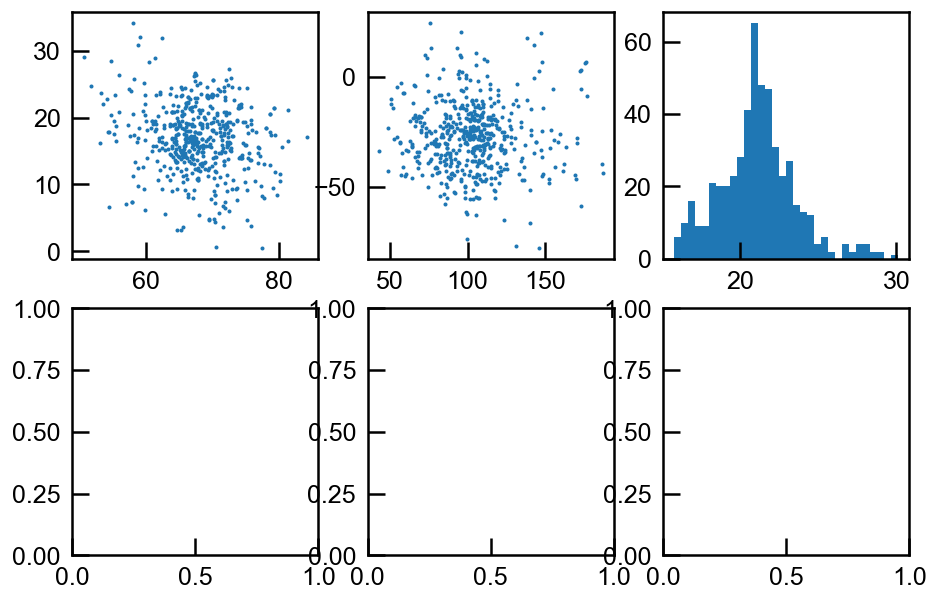

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
ax[0, 0].scatter(g['ra'], g['dec'], s=2)
ax[0, 1].scatter(g['pmra'], g['pmdec'], s=2)
ax[0, 2].hist(g['parallax'], bins=32);

In [7]:
g = g.pipe(gp.add_vtan).pipe(gp.add_vtan_errors)
g[['parallax_over_error', 'vra_error', 'vdec_error', 'radial_velocity_error']].describe()

,parallax_over_error,vra_error,vdec_error,radial_velocity_error
count,515.000000,515.000000,515.000000,156.000000
mean,280.322675,0.124635,0.045513,0.569454
std,135.786462,0.104110,0.039675,0.609632
min,25.762049,0.035705,0.009467,0.113650
25%,171.445155,0.065658,0.022124,0.246124
50%,272.773650,0.091804,0.032962,0.357671
75%,371.367265,0.140291,0.050531,0.633082
max,627.169100,0.841056,0.278363,4.143243


In [5]:
dd = dd.pipe(gp.add_vtan).pipe(gp.add_vtan_errors)
errors = dd[['Cluster', 'parallax_over_error', 'vra_error', 'vdec_error', 'radial_velocity_error']]\
    .groupby('Cluster').agg({
    'parallax_over_error':['median', 'mean'],
    'vra_error':['median', 'mean'],
    'vdec_error':['median', 'mean'],
    'radial_velocity_error': ['median', 'mean'],
    'Cluster':['count']
})
errors

INFO:numexpr.utils:Note: detected 88 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 88 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


parallax_over_error             vra_error           vdec_error  \
                      median        mean    median      mean     median   
Cluster                                                                   
Blanco1            33.887860   49.268400  0.668788  0.793380   0.204630   
ComaBer           165.157330  169.279449  0.052943  0.074983   0.040168   
Hyades            272.773650  280.322675  0.091804  0.124635   0.032962   
IC2391             94.861534  125.733258  0.210297  0.280312   0.201421   
IC2602             98.576005  123.692650  0.156315  0.211452   0.107208   
NGC2451            68.279018   90.041722  0.307214  0.391219   0.250416   
Pleiades           63.594260   83.016813  0.249887  0.293986   0.467725   
Praesepe           49.622673   63.713630  0.656499  0.912620   0.247711   
alphaPer           64.110688   81.483529  0.335513  0.425066   0.351089   

                   radial_velocity_error           Cluster  
              mean                median      mean   count  
Cluster                                                     
Blanco1   0.246764              1.564140  2.298944     489  
ComaBer   0.059856              0.593270  1.285943     153  
Hyades    0.045513              0.357671  0.569454     515  
IC2391    0.264855              2.038053  3.825926     325  
IC2602    0.148089              2.788115  4.036832     492  
NGC2451   0.309475              2.521862  3.383824     400  
Pleiades  0.559379              1.338565  2.858925    1326  
Praesepe  0.344948              1.060326  1.683819     938  
alphaPer  0.449386              2.739670  3.905128     740

In [6]:
kn.set_mpl_style()

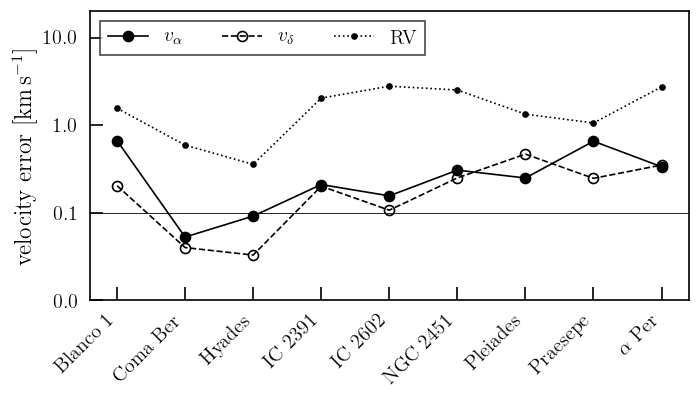

In [13]:
fig, ax = plt.subplots(figsize=(6,3.5))
x = np.arange(len(errors))
ax.plot(x, errors['vra_error','median'], marker='o', c='k', label=r'$v_\alpha$')
ax.plot(x, errors['vdec_error','median'], marker='o', mfc='None', c='k', ls='--', label=r'$v_\delta$')
ax.plot(x, errors['radial_velocity_error','median'], marker='.', ls=':', c='k', label='RV')
plt.xticks(x, ['Blanco 1', 'Coma Ber', 'Hyades', 'IC 2391', 'IC 2602', 'NGC 2451', 'Pleiades', 'Praesepe', r'$\alpha$ Per'],
           rotation=45, ha='right');
ax.axhline(0.1, c='k', lw=.5)
ax.set_ylabel('velocity error [$\mathrm{km}\,\mathrm{s}^{-1}$]')
ax.legend(loc='upper left', fontsize=12, ncol=3);
ax.set_yscale('log')
ax.set_ylim(.01,20)
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.ScalarFormatter())
fig.tight_layout()
fig.savefig('../report/plots/dr2_clusters_median_velocity_errors.pdf');